In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("/content/Emotion_final.xlsx")

print(df.shape)   # rows, columns
print(df.head())  # preview


(21459, 2)
                                                Text  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [ ]:

print(df.isnull().sum())

Text       0
Emotion    0
dtype: int64


/tmp/ipython-input-595596152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Emotion", data=df, order=df["Emotion"].value_counts().index, palette="Set2")


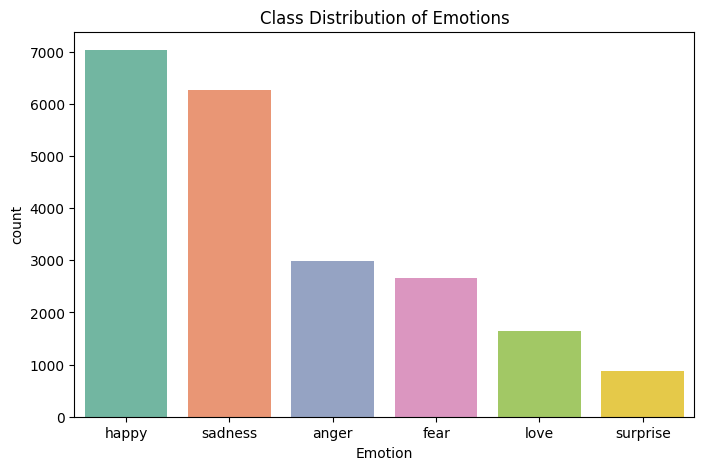

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Emotion", data=df, order=df["Emotion"].value_counts().index, palette="Set2")
plt.title("Class Distribution of Emotions")
plt.show()


/tmp/ipython-input-2056494285.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


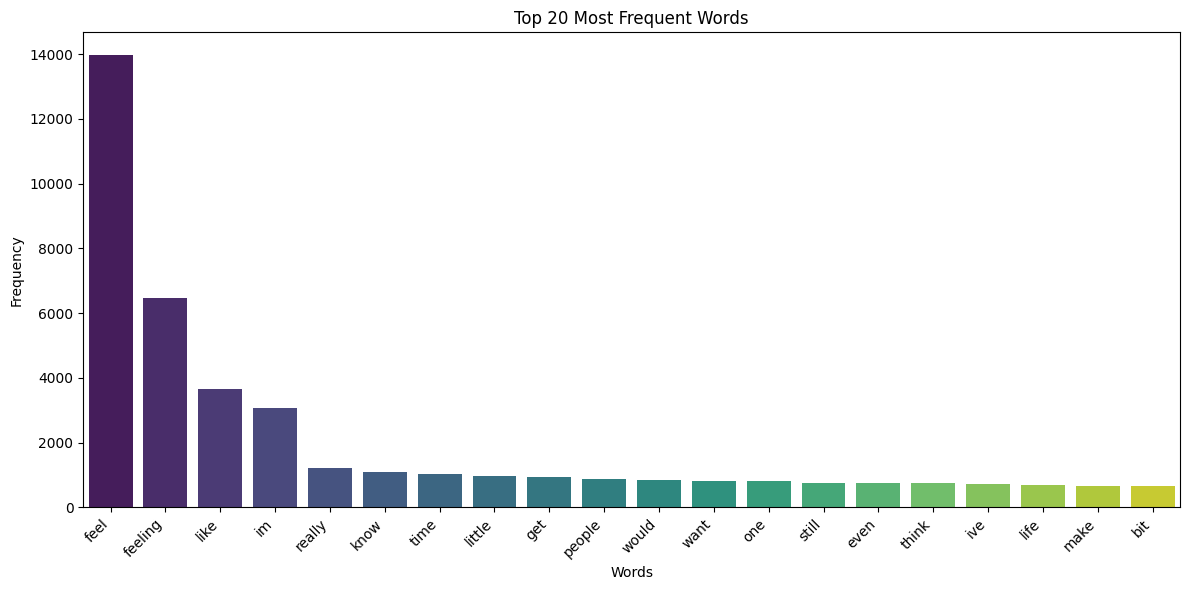

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Count word frequencies in the cleaned text
all_words = " ".join(df["Cleaned_Text"]).split()
word_counts = Counter(all_words)

# Get the top 20 most frequent words
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

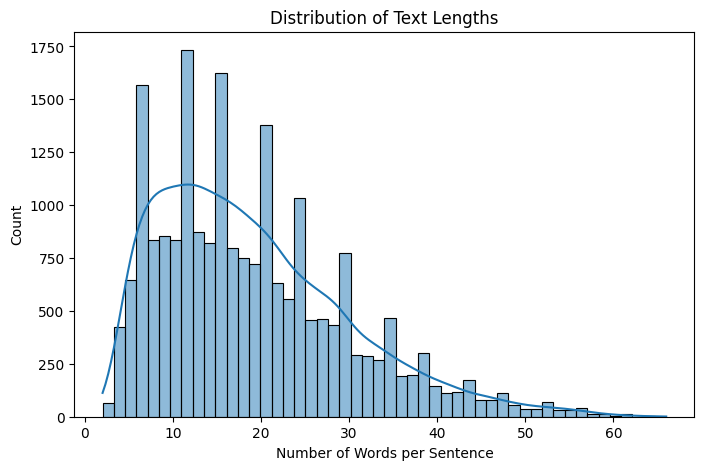

In [ ]:
df["text_length"] = df["Text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words per Sentence")
plt.show()


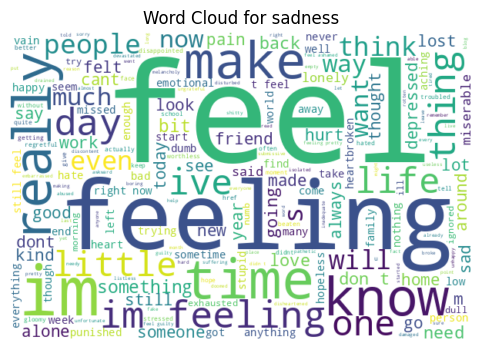

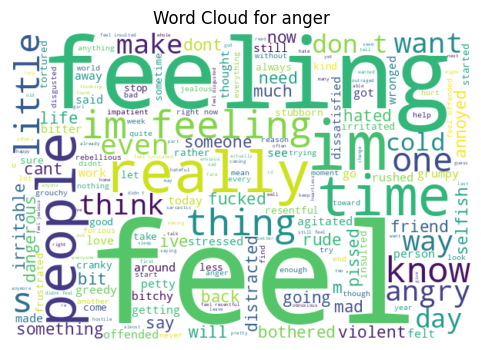

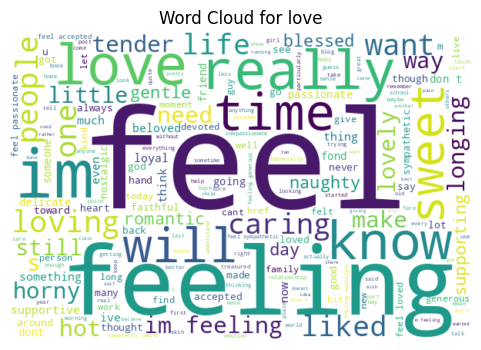

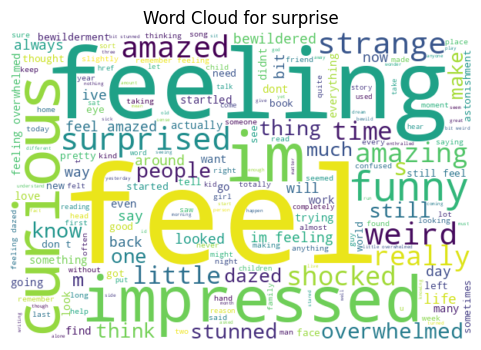

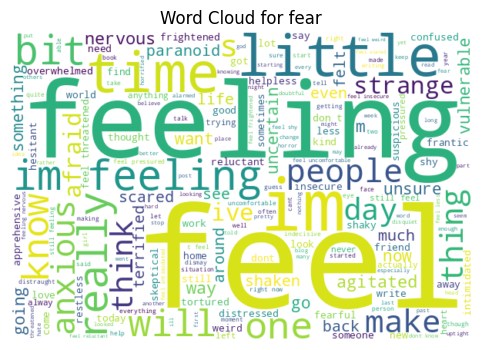

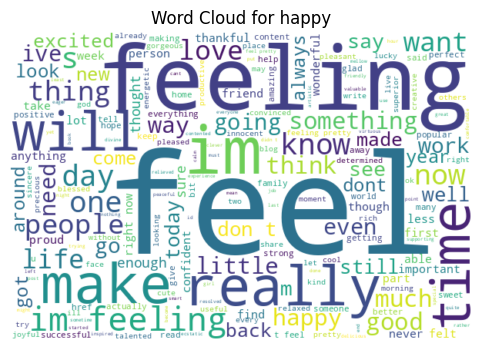

In [ ]:
from collections import Counter
from wordcloud import WordCloud

for emotion in df["Emotion"].unique():
    text = " ".join(df[df["Emotion"]==emotion]["Text"])
    wc = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.figure(figsize=(6,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {emotion}")
    plt.show()


In [ ]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

def clean_text(s):
    s = str(s).lower()
    s = re.sub(r"http\S+", "", s)
    s = re.sub(r"[^a-z\s]", "", s) # This line removes punctuation by keeping only lowercase letters and spaces
    tokens = [t for t in s.split() if t not in stop]
    return " ".join(tokens)

df["Cleaned_Text"] = df["Text"].apply(clean_text)
print(df["Cleaned_Text"].head())

0                                didnt feel humiliated
1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
Name: Cleaned_Text, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(df["Cleaned_Text"].apply(lambda x: x.split()).head())

0                            [didnt, feel, humiliated]
1    [go, feeling, hopeless, damned, hopeful, aroun...
2    [im, grabbing, minute, post, feel, greedy, wrong]
3    [ever, feeling, nostalgic, fireplace, know, st...
4                                   [feeling, grouchy]
Name: Cleaned_Text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df["Cleaned_Text"])

print("Shape of the TF-IDF matrix:", X_tfidf.shape)

Shape of the TF-IDF matrix: (21459, 19092)


In [ ]:
from sklearn.model_selection import train_test_split

X = df["Cleaned_Text"]
y = df["Emotion"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, stratify=y, random_state=42
)

# Train a Logistic Regression model without regularization (for comparison)
model_no_reg = LogisticRegression(max_iter=1000)
model_no_reg.fit(X_train, y_train)

# Evaluate the model on training data
print("Classification Report for Training Data (No Regularization):")
y_train_pred_no_reg = model_no_reg.predict(X_train)
print(classification_report(y_train, y_train_pred_no_reg))

# Evaluate the model on testing data
print("\nClassification Report for Testing Data (No Regularization):")
y_test_pred_no_reg = model_no_reg.predict(X_test)
print(classification_report(y_test, y_test_pred_no_reg))

Classification Report for Training Data (No Regularization):
              precision    recall  f1-score   support

       anger       0.97      0.94      0.95      2394
        fear       0.96      0.92      0.94      2122
       happy       0.93      0.98      0.95      5623
        love       0.95      0.83      0.89      1313
     sadness       0.95      0.98      0.97      5012
    surprise       0.97      0.78      0.86       703

    accuracy                           0.95     17167
   macro avg       0.95      0.90      0.93     17167
weighted avg       0.95      0.95      0.95     17167


Classification Report for Testing Data (No Regularization):
              precision    recall  f1-score   support

       anger       0.88      0.78      0.83       599
        fear       0.86      0.76      0.81       530
       happy       0.83      0.96      0.89      1406
        love       0.90      0.62      0.74       328
     sadness       0.87      0.94      0.91      1253
    surpri

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train a Logistic Regression model with L2 regularization
model_reg = LogisticRegression(penalty='l2', max_iter=1000) # L2 regularization
model_reg.fit(X_train, y_train)

# Evaluate the regularized model on training data
print("Classification Report for Training Data (L2 Regularization):")
y_train_pred_reg = model_reg.predict(X_train)
print(classification_report(y_train, y_train_pred_reg))

# Evaluate the regularized model on testing data
print("\nClassification Report for Testing Data (L2 Regularization):")
y_test_pred_reg = model_reg.predict(X_test)
print(classification_report(y_test, y_test_pred_reg))

Classification Report for Training Data (L2 Regularization):
              precision    recall  f1-score   support

       anger       0.97      0.94      0.95      2394
        fear       0.96      0.92      0.94      2122
       happy       0.93      0.98      0.95      5623
        love       0.95      0.83      0.89      1313
     sadness       0.95      0.98      0.97      5012
    surprise       0.97      0.78      0.86       703

    accuracy                           0.95     17167
   macro avg       0.95      0.90      0.93     17167
weighted avg       0.95      0.95      0.95     17167


Classification Report for Testing Data (L2 Regularization):
              precision    recall  f1-score   support

       anger       0.88      0.78      0.83       599
        fear       0.86      0.76      0.81       530
       happy       0.83      0.96      0.89      1406
        love       0.90      0.62      0.74       328
     sadness       0.87      0.94      0.91      1253
    surpri

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train a Logistic Regression model with class weights
model_weighted = LogisticRegression(class_weight='balanced', max_iter=1000)
model_weighted.fit(X_train, y_train)

# Evaluate the weighted model on training data
print("Classification Report for Training Data (Weighted):")
y_train_pred_weighted = model_weighted.predict(X_train)
print(classification_report(y_train, y_train_pred_weighted))

# Evaluate the weighted model on testing data
print("\nClassification Report for Testing Data (Weighted):")
y_test_pred_weighted = model_weighted.predict(X_test)
print(classification_report(y_test, y_test_pred_weighted))

Classification Report for Training Data (Weighted):
              precision    recall  f1-score   support

       anger       0.93      0.97      0.95      2394
        fear       0.94      0.96      0.95      2122
       happy       0.99      0.91      0.95      5623
        love       0.79      0.99      0.88      1313
     sadness       0.98      0.94      0.96      5012
    surprise       0.82      1.00      0.90       703

    accuracy                           0.94     17167
   macro avg       0.91      0.96      0.93     17167
weighted avg       0.95      0.94      0.95     17167


Classification Report for Testing Data (Weighted):
              precision    recall  f1-score   support

       anger       0.85      0.88      0.87       599
        fear       0.84      0.83      0.84       530
       happy       0.94      0.89      0.91      1406
        love       0.74      0.91      0.82       328
     sadness       0.94      0.89      0.91      1253
    surprise       0.66     

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train a Logistic Regression model with L2 regularization and class weights
model_reg_weighted = LogisticRegression(penalty='l2', class_weight='balanced', max_iter=1000)
model_reg_weighted.fit(X_train, y_train)

# Evaluate the regularized and weighted model on training data
print("Classification Report for Training Data (L2 Regularization and Weighted):")
y_train_pred_reg_weighted = model_reg_weighted.predict(X_train)
print(classification_report(y_train, y_train_pred_reg_weighted))

# Evaluate the regularized and weighted model on testing data
print("\nClassification Report for Testing Data (L2 Regularization and Weighted):")
y_test_pred_reg_weighted = model_reg_weighted.predict(X_test)
print(classification_report(y_test, y_test_pred_reg_weighted))

Classification Report for Training Data (L2 Regularization and Weighted):
              precision    recall  f1-score   support

       anger       0.93      0.97      0.95      2394
        fear       0.94      0.96      0.95      2122
       happy       0.99      0.91      0.95      5623
        love       0.79      0.99      0.88      1313
     sadness       0.98      0.94      0.96      5012
    surprise       0.82      1.00      0.90       703

    accuracy                           0.94     17167
   macro avg       0.91      0.96      0.93     17167
weighted avg       0.95      0.94      0.95     17167


Classification Report for Testing Data (L2 Regularization and Weighted):
              precision    recall  f1-score   support

       anger       0.85      0.88      0.87       599
        fear       0.84      0.83      0.84       530
       happy       0.94      0.89      0.91      1406
        love       0.74      0.91      0.82       328
     sadness       0.94      0.89     

The second model explicitly uses L2 regularization and class weighting → this is theoretically better because:

L2 regularization reduces overfitting.

Weighted classes help minority classes, though in your dataset, “love” and “surprise” still lag slightly.

In practice, both models perform almost the same numerically, but the second one is more robust and theoretically preferable because it incorporates techniques that prevent overfitting and account for class imbalance.

In [ ]:
import joblib
joblib.dump(model, "emotion_model.pkl")


['emotion_model.pkl']

In [ ]:
import joblib
# Assuming the last trained model (model_reg_weighted) is the one you want to use
# Make sure to save the correct model in the previous step if you want to use a different one
# joblib.dump(model_reg_weighted, "emotion_model.pkl") # Uncomment and run this line if you want to save the weighted and regularized model

model = joblib.load("emotion_model.pkl")

sample_texts = [
    "I am so excited about my new job!",
    "I feel nervous before the exam",
    "oh you fell",
    "i feel strange",
    "what the hell is wrong with this model",
    "i felt agitated when he said this to me",
    "i love this model"
]

# Transform the sample texts using the same TF-IDF vectorizer used for training
sample_texts_tfidf = tfidf_vectorizer.transform(sample_texts)

pred = model.predict(sample_texts_tfidf)
for t, p in zip(sample_texts, pred):
    print(f"Text: {t} → Predicted Emotion: {p}")

Text: I am so excited about my new job! → Predicted Emotion: happy
Text: I feel nervous before the exam → Predicted Emotion: fear
Text: oh you fell → Predicted Emotion: sadness
Text: i feel strange → Predicted Emotion: surprise
Text: what the hell is wrong with this model → Predicted Emotion: sadness
Text: i felt agitated when he said this to me → Predicted Emotion: anger
Text: i love this model → Predicted Emotion: happy
